### project 2 

In [1]:
from sklearn.datasets import load_digits
digits = load_digits()

In [2]:
print(digits.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 1797
:Number of Attributes: 64
:Attribute Information: 8x8 image of integer pixels in the range 0..16.
:Missing Attribute Values: None
:Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
:Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each block. This generates
an in

In [3]:
digits.target.shape

(1797,)

In [4]:
digits.data.shape

(1797, 64)

In [5]:
digits.images.shape

(1797, 8, 8)

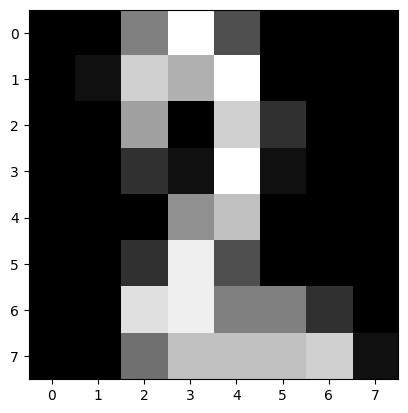

In [11]:
import matplotlib.pyplot as plt
x =digits.images[22]
plt.gray() # show pic in gray mode
plt.imshow(x) # show pic cmd
plt.show()

### Preproccessing

In [12]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(digits.data,digits.target,test_size=0.3)

In [13]:
x_train[0]

array([ 0.,  1., 15., 16., 10.,  0.,  0.,  0.,  0.,  7., 15., 10., 16.,
        0.,  0.,  0.,  0.,  4., 12.,  1., 16.,  4.,  0.,  0.,  0.,  0.,
        2.,  3., 16.,  1.,  0.,  0.,  0.,  0.,  0.,  4., 15.,  0.,  0.,
        0.,  0.,  0.,  0., 11., 12.,  0.,  0.,  0.,  0.,  0., 11., 16.,
       14., 14., 15.,  3.,  0.,  1., 15., 16., 16., 16., 16.,  5.])

#### Normalize

In [15]:
from sklearn.preprocessing import MinMaxScaler
scaler= MinMaxScaler((0,1))
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

In [16]:
x_train[0]

array([0.        , 0.125     , 0.9375    , 1.        , 0.625     ,
       0.        , 0.        , 0.        , 0.        , 0.46666667,
       0.9375    , 0.625     , 1.        , 0.        , 0.        ,
       0.        , 0.        , 0.25      , 0.75      , 0.0625    ,
       1.        , 0.25      , 0.        , 0.        , 0.        ,
       0.        , 0.125     , 0.1875    , 1.        , 0.0625    ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.25      , 0.9375    , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.6875    , 0.75      ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.6875    , 1.        , 0.875     , 0.875     , 0.9375    ,
       0.3       , 0.        , 0.11111111, 0.9375    , 1.        ,
       1.        , 1.        , 1.        , 0.3125    ])

# Performance Metric

In [24]:
from sklearn.metrics import accuracy_score,recall_score,precision_score
def calculate_metrics(y_train,y_test,y_pred_train,y_pred_test):
    accTrain=accuracy_score(y_true=y_train,y_pred=y_pred_train)
    accTest=accuracy_score(y_true=y_test,y_pred=y_pred_test)
    precision =precision_score(y_true=y_test,y_pred=y_pred_test ,average='weighted')
    recall =recall_score(y_true=y_test,y_pred=y_pred_test ,average='weighted')
    print(f"accuracy Train:{accTrain}\n accuracy Test:{accTest}\n Precision Score:{precision} \n Recall Score:{recall}")
    
    return accTrain , accTest ,precision ,recall

## Classification

### 1.Random Forest

In [21]:
from sklearn.ensemble import RandomForestClassifier
rf= RandomForestClassifier(max_depth=128,n_estimators=256)

In [22]:
rf.fit(x_train,y_train)

RandomForestClassifier(max_depth=128, n_estimators=256)

In [25]:
y_pred_train = rf.predict(x_train)
y_pred_test = rf.predict(x_test)

accTrain_rf , accTest_rf ,precision_rf ,recall_rf =calculate_metrics(y_train,y_test,y_pred_train,y_pred_test)

accuracy Train:1.0
 accuracy Test:0.9703703703703703
 Precision Score:0.9706369805027762 
 Recall Score:0.9703703703703703


### 3.SVM

In [26]:
from sklearn.svm import SVC
svm=SVC()

In [27]:
svm.fit(x_train,y_train)

SVC()

In [28]:
y_pred_train = svm.predict(x_train)
y_pred_test = svm.predict(x_test)

accTrain_svm , accTest_svm ,precision_svm ,recall_svm =calculate_metrics(y_train,y_test,y_pred_train,y_pred_test)

accuracy Train:0.9968178202068417
 accuracy Test:0.9851851851851852
 Precision Score:0.9853578220304171 
 Recall Score:0.9851851851851852
